<a href="https://colab.research.google.com/github/ayushrajpoot2308/Image-Classification-CIFAR10/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

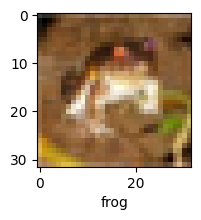

In [ ]:
plot_sample(X_train, y_train, 0)

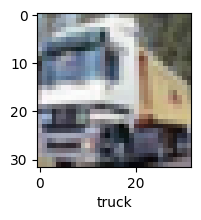

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.3043 - loss: 1.9315
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.4212 - loss: 1.6448
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.4521 - loss: 1.5542
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.4755 - loss: 1.4915
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.4891 - loss: 1.4381


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.59      0.55      1000
           1       0.74      0.37      0.50      1000
           2       0.41      0.25      0.31      1000
           3       0.31      0.51      0.38      1000
           4       0.39      0.47      0.42      1000
           5       0.52      0.20      0.29      1000
           6       0.48      0.62      0.54      1000
           7       0.66      0.41      0.50      1000
           8       0.59      0.66      0.62      1000
           9       0.46      0.69      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3873 - loss: 1.6976
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.5915 - loss: 1.1612
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6443 - loss: 1.0142
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.6787 - loss: 0.9196
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.7063 - loss: 0.8441
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7252 - loss: 0.7851
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7453 - loss: 0.7246
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7658 - loss: 0.6694
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7796 - loss: 0.6253
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.7978 - loss: 0.5827


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6925 - loss: 0.9548


[0.9705355763435364, 0.6858000159263611]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[8.3288434e-04, 3.4442483e-04, 4.1697668e-03, 9.1290921e-01,
        1.6730984e-05, 7.2455354e-02, 1.2793402e-04, 1.7632354e-05,
        9.1156065e-03, 1.0430656e-05],
       [3.7722467e-03, 9.2467749e-01, 4.8356407e-07, 4.3973091e-06,
        1.4454395e-08, 4.0728834e-09, 1.2894315e-08, 9.8156117e-10,
        7.1107224e-02, 4.3815511e-04],
       [6.1027069e-02, 5.5496323e-01, 1.3345142e-03, 2.2983158e-02,
        6.1782158e-04, 1.4014702e-04, 4.9869200e-06, 5.7384762e-04,
        3.0799478e-01, 5.0360415e-02],
       [9.9867558e-01, 1.5768825e-05, 3.7509846e-04, 1.2851675e-04,
        1.3846729e-05, 1.1759610e-06, 1.3067747e-06, 6.3132467e-07,
        7.2646706e-04, 6.1678300e-05],
       [5.9353653e-07, 5.4096364e-07, 4.7521751e-02, 2.3115471e-02,
        7.2207129e-01, 1.2432344e-03, 2.0602600e-01, 1.6331194e-05,
        4.1312524e-06, 7.2567406e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(1), np.int64(1), np.int64(0), np.int64(4)]

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6925 - loss: 0.9548


[0.9705355763435364, 0.6858000159263611]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

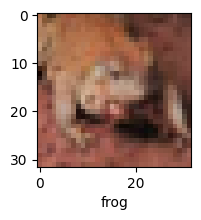

In [ ]:
plot_sample(X_test, y_test,5)

In [ ]:
classes[y_classes[5]]

'frog'

In [ ]:
classes[y_classes[1]]

'automobile'